### Imports

In [38]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
df = pd.read_csv('data/Final_merged_dataset_clean.csv')

In [3]:
df.shape, df.columns.values

((13297, 96),
 array(['id', 'home_team_api_id', 'away_team_api_id', 'crossing_h',
        'finishing_h', 'heading_accuracy_h', 'short_passing_h',
        'volleys_h', 'dribbling_h', 'curve_h', 'free_kick_accuracy_h',
        'long_passing_h', 'ball_control_h', 'acceleration_h',
        'sprint_speed_h', 'agility_h', 'reactions_h', 'balance_h',
        'shot_power_h', 'jumping_h', 'stamina_h', 'strength_h',
        'long_shots_h', 'aggression_h', 'interceptions_h', 'positioning_h',
        'vision_h', 'penalties_h', 'marking_h', 'standing_tackle_h',
        'sliding_tackle_h', 'gk_diving_h', 'gk_handling_h', 'gk_kicking_h',
        'gk_positioning_h', 'gk_reflexes_h', 'crossing_a', 'finishing_a',
        'heading_accuracy_a', 'short_passing_a', 'volleys_a',
        'dribbling_a', 'curve_a', 'free_kick_accuracy_a', 'long_passing_a',
        'ball_control_a', 'acceleration_a', 'sprint_speed_a', 'agility_a',
        'reactions_a', 'balance_a', 'shot_power_a', 'jumping_a',
        'stamina_

In [4]:
df.head(5)

,id,home_team_api_id,away_team_api_id,crossing_h,finishing_h,heading_accuracy_h,short_passing_h,volleys_h,dribbling_h,curve_h,...,defenceAggression_h,defenceTeamWidth_h,buildUpPlaySpeed_a,buildUpPlayPassing_a,chanceCreationPassing_a,chanceCreationCrossing_a,chanceCreationShooting_a,defencePressure_a,defenceAggression_a,defenceTeamWidth_a
0,1729,10260,10261,81.0,72.0,81.0,81.0,79.0,79.0,79.0,...,48.000000,54.833333,58.166667,55.333333,53.500000,57.333333,49.833333,46.666667,48.333333,48.333333
1,1730,9825,8659,77.0,80.0,90.0,88.0,79.0,79.0,80.0,...,46.500000,50.500000,57.500000,51.500000,53.000000,56.000000,54.666667,43.000000,45.666667,54.833333
2,1731,8472,8650,79.0,66.0,78.0,82.0,69.0,80.0,78.0,...,52.166667,51.833333,57.666667,44.333333,41.333333,47.833333,57.333333,51.000000,52.500000,56.000000
3,1732,8654,8528,81.0,71.0,77.0,87.0,69.0,81.0,80.0,...,42.833333,40.166667,47.166667,50.666667,52.666667,55.500000,45.500000,50.000000,54.000000,46.000000
4,1734,8668,8655,74.0,80.0,74.0,83.0,77.0,80.0,78.0,...,57.500000,56.333333,52.500000,63.833333,57.000000,56.000000,42.000000,45.666667,55.000000,46.666667


In [5]:
####pd.get_dummies(df, columns='').head()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['match_winner', 'id']), 
                                                    df.match_winner, test_size=0.3, 
                                                    random_state=47)

In [7]:
X_train.shape, X_test.shape

((9307, 94), (3990, 94))

In [8]:
y_train.shape, y_test.shape

((9307,), (3990,))

In [9]:
X_train.dtypes

home_team_api_id              int64
away_team_api_id              int64
crossing_h                  float64
finishing_h                 float64
heading_accuracy_h          float64
                             ...   
chanceCreationCrossing_a    float64
chanceCreationShooting_a    float64
defencePressure_a           float64
defenceAggression_a         float64
defenceTeamWidth_a          float64
Length: 94, dtype: object

In [10]:
X_test.dtypes

home_team_api_id              int64
away_team_api_id              int64
crossing_h                  float64
finishing_h                 float64
heading_accuracy_h          float64
                             ...   
chanceCreationCrossing_a    float64
chanceCreationShooting_a    float64
defencePressure_a           float64
defenceAggression_a         float64
defenceTeamWidth_a          float64
Length: 94, dtype: object

In [11]:
train_mean = y_train.mean()
train_mean

1.8189534758783712

Draw most likely outcome, though this could be influence by even distribution of wins and losses for home teams

In [12]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[1.81895348]])

In [13]:
X_defaults_median = X_train.median()
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [14]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_te)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
RF_model = RandomForestRegressor(n_estimators=50)

In [17]:
RF_model.fit(X_tr_scaled, y_train)

RandomForestRegressor(n_estimators=50)

In [18]:
cv_results = cross_validate(RF_model, X_te, y_test, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [19]:
cv_results['test_score']

array([-0.68982456, -0.72238095, -0.70045113, -0.71062657, -0.73857143])

In [20]:
RF_model.predict(X_te)

array([2.22, 2.28, 2.28, ..., 2.22, 2.28, 2.22])

In [21]:
importance = RF_model.feature_importances_
importance

array([0.01200102, 0.01149   , 0.0108239 , 0.01150081, 0.01400084,
       0.00830155, 0.01013679, 0.00790254, 0.00957798, 0.01235282,
       0.00915584, 0.00779779, 0.00992792, 0.01135109, 0.01036994,
       0.00854157, 0.01147262, 0.00901699, 0.01212158, 0.01172731,
       0.0123875 , 0.00909068, 0.01301968, 0.01384422, 0.00932452,
       0.01016797, 0.01088521, 0.01082982, 0.00958032, 0.01063525,
       0.00842772, 0.00835752, 0.01292713, 0.00761865, 0.00812492,
       0.01057205, 0.01112465, 0.01306824, 0.0084341 , 0.01093857,
       0.00818988, 0.00933782, 0.01108917, 0.00976667, 0.00734882,
       0.01081295, 0.00935697, 0.01106486, 0.00922662, 0.01238828,
       0.00965631, 0.01151841, 0.01138995, 0.01280478, 0.00840994,
       0.01144947, 0.01332756, 0.00893918, 0.00840595, 0.009903  ,
       0.01062252, 0.00940484, 0.00949711, 0.00834941, 0.00753072,
       0.01262362, 0.00731996, 0.00736532, 0.00304492, 0.00375003,
       0.00285353, 0.00335296, 0.00450091, 0.00278381, 0.01061

In [22]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01200
Feature: 1, Score: 0.01149
Feature: 2, Score: 0.01082
Feature: 3, Score: 0.01150
Feature: 4, Score: 0.01400
Feature: 5, Score: 0.00830
Feature: 6, Score: 0.01014
Feature: 7, Score: 0.00790
Feature: 8, Score: 0.00958
Feature: 9, Score: 0.01235
Feature: 10, Score: 0.00916
Feature: 11, Score: 0.00780
Feature: 12, Score: 0.00993
Feature: 13, Score: 0.01135
Feature: 14, Score: 0.01037
Feature: 15, Score: 0.00854
Feature: 16, Score: 0.01147
Feature: 17, Score: 0.00902
Feature: 18, Score: 0.01212
Feature: 19, Score: 0.01173
Feature: 20, Score: 0.01239
Feature: 21, Score: 0.00909
Feature: 22, Score: 0.01302
Feature: 23, Score: 0.01384
Feature: 24, Score: 0.00932
Feature: 25, Score: 0.01017
Feature: 26, Score: 0.01089
Feature: 27, Score: 0.01083
Feature: 28, Score: 0.00958
Feature: 29, Score: 0.01064
Feature: 30, Score: 0.00843
Feature: 31, Score: 0.00836
Feature: 32, Score: 0.01293
Feature: 33, Score: 0.00762
Feature: 34, Score: 0.00812
Feature: 35, Score: 0.01057
Fe

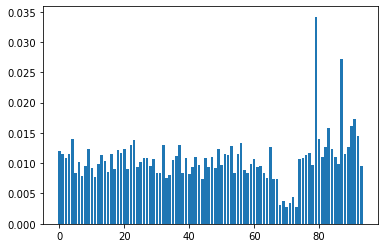

In [23]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [24]:
importance.sort()

In [25]:
importance

array([0.00278381, 0.00285353, 0.00304492, 0.00335296, 0.00375003,
       0.00450091, 0.00731996, 0.00734882, 0.00736532, 0.00753072,
       0.00761865, 0.00779779, 0.00790254, 0.00812492, 0.00818988,
       0.00830155, 0.00834941, 0.00835752, 0.00840595, 0.00840994,
       0.00842772, 0.0084341 , 0.00854157, 0.00893918, 0.00901699,
       0.00909068, 0.00915584, 0.00922662, 0.00932452, 0.00933782,
       0.00935697, 0.00940484, 0.00949711, 0.0095164 , 0.00957798,
       0.00958032, 0.00965631, 0.00975443, 0.00976667, 0.0098045 ,
       0.009903  , 0.00992792, 0.01013679, 0.01016797, 0.01036994,
       0.01057205, 0.01061065, 0.01062252, 0.01063525, 0.01078074,
       0.01081295, 0.0108239 , 0.01082982, 0.01088521, 0.01093857,
       0.01095551, 0.01101678, 0.01106486, 0.01108917, 0.01112465,
       0.01135109, 0.0113679 , 0.01138995, 0.01144947, 0.01147262,
       0.01149   , 0.01150081, 0.01151841, 0.0115966 , 0.01171736,
       0.01172731, 0.01200102, 0.01212158, 0.01235282, 0.01236

In [26]:
df.columns[79]

'fouls_a'

In [27]:
df.columns[87]

'defenceTeamWidth_h'

(array([5399.,  555., 1557., 2127., 1913., 1257.,  344.,  100.,   35.,
          10.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

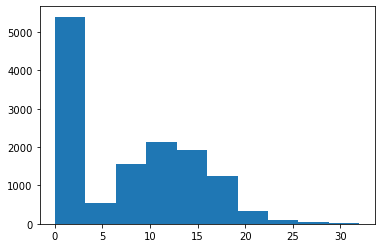

In [28]:
plt.hist(df['fouls_a'])

(array([  64.,  127.,  604., 1673., 2018., 3281., 3239., 1475.,  223.,
         593.]),
 array([33.66666667, 36.95      , 40.23333333, 43.51666667, 46.8       ,
        50.08333333, 53.36666667, 56.65      , 59.93333333, 63.21666667,
        66.5       ]),
 <BarContainer object of 10 artists>)

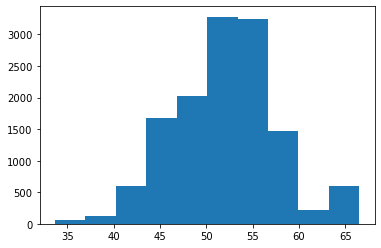

In [29]:
plt.hist(df['defenceTeamWidth_h'])

# Make The Pipeline

In [36]:
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model_list = [RandomForestClassifier(),
    RidgeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC()]

In [45]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [62]:
K_fit = KNeighborsClassifier().fit(X_tr_scaled, y_train)

In [63]:
K_cv_results = cross_validate(K_fit, X_te, y_test, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [64]:
cv_results['test_score']

array([-0.68982456, -0.72238095, -0.70045113, -0.71062657, -0.73857143])

In [69]:
k_pred = K_fit.predict(X_te)

In [72]:
np.unique(k_pred)

array([1, 3])

In [73]:
k_pred.shape

(3990,)

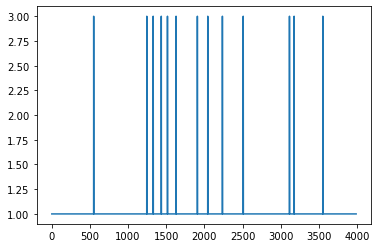

In [74]:
plt.plot(k_pred)

(array([3977.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          13.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

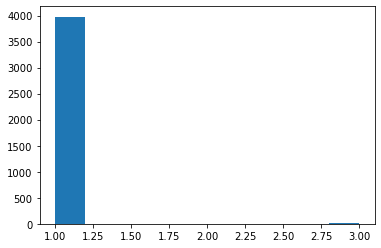

In [77]:
plt.hist(k_pred)

In [ ]:
###Lasso CV?Kold Prism and Koll